In [43]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score
from catboost import Pool, CatBoostClassifier, cv
from sklearn.model_selection import train_test_split

# Figures inline and set visualization style
%matplotlib inline
sns.set()

In [3]:
# Import test and train datasets
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

# View first lines of training data
train.head(n=4)

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,0,41,ANAMBRA,No,Married,No,No,0,0
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,0,52,ANAMBRA,Yes,Married,No,No,0,0
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1987,7.5,2012,0,0,42,KATSINA,Yes,Married,No,No,0,0
3,YAK/S/00004,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,3,1982,2.5,2009,0,0,42,NIGER,Yes,Single,No,No,1,0


In [5]:
# View first lines of test data
test.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers
0,YAK/S/00005,Information Technology and Solution Support,First Degree or HND,Male,Agency and others,2,1976,7.5,2017,0,0,65,FCT,Yes,Married,No,No,1
1,YAK/S/00011,Information Technology and Solution Support,NaN,Male,Direct Internal process,2,1991,0.0,2018,0,0,69,OGUN,Yes,Married,No,No,1
2,YAK/S/00015,Research and Innovation,"MSc, MBA and PhD",Male,Direct Internal process,2,1984,7.5,2012,0,0,76,KANO,Yes,Married,No,No,1
3,YAK/S/00016,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1984,2.5,2009,0,0,52,RIVERS,No,Single,No,No,1
4,YAK/S/00017,Information Technology and Solution Support,First Degree or HND,Male,Agency and others,2,1983,7.5,2014,1,0,69,FCT,Yes,Married,No,No,0


In [6]:
# summary statistics of numeric columns
train.describe()

,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,Promoted_or_Not
count,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000
mean,2.253680,1986.209334,7.698959,2013.139695,0.352996,0.023152,55.366465,0.084595
std,0.609443,7.646047,3.744135,4.261451,0.477908,0.150388,13.362741,0.278282
min,2.000000,1950.000000,0.000000,1982.000000,0.000000,0.000000,31.000000,0.000000
25%,2.000000,1982.000000,5.000000,2012.000000,0.000000,0.000000,43.000000,0.000000
50%,2.000000,1988.000000,7.500000,2014.000000,0.000000,0.000000,52.000000,0.000000
75%,2.000000,1992.000000,10.000000,2016.000000,1.000000,0.000000,68.000000,0.000000
max,11.000000,2001.000000,12.500000,2018.000000,1.000000,1.000000,91.000000,1.000000


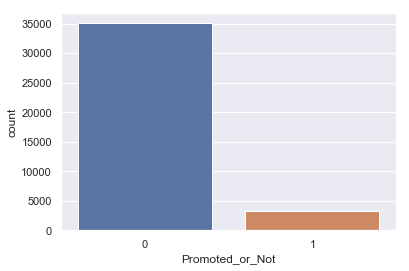

In [54]:
sns.countplot(x='Promoted_or_Not', data=train);

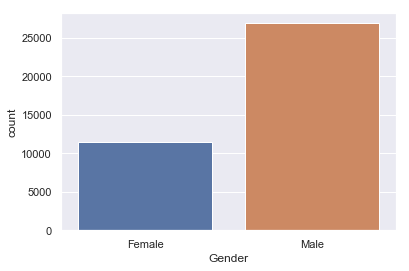

In [7]:
sns.countplot(x='Gender', data=train);

C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


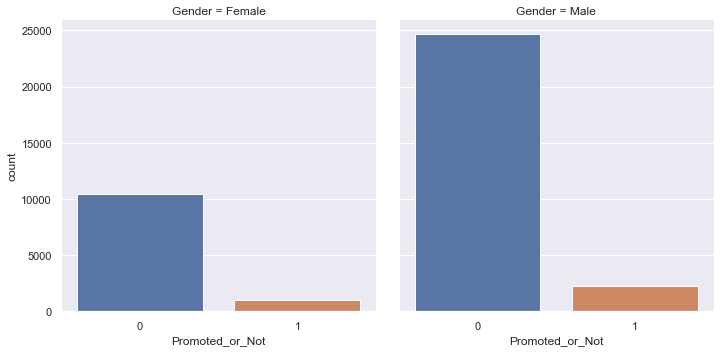

In [10]:
# Use seaborn to build bar plots of the dataset feature 'Promoted_or_Not' split (faceted) over the feature 'Gender'
sns.factorplot(x='Promoted_or_Not', col='Gender', kind='count', data=train);

In [13]:
#How many Female and how many Male got promoted_not:
train.groupby(['Gender']).Promoted_or_Not.sum()

Gender
Female    1018
Male      2223
Name: Promoted_or_Not, dtype: int64

Percentage of positive target: 8.4595 %
Percentage of negative target: 91.5405 %


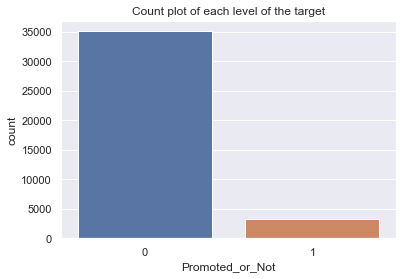

In [14]:
# The proportion of Female that got promoted_note, along with the proportion of male:
sns.countplot(x = train["Promoted_or_Not"])
plt.title("Count plot of each level of the target")
print("Percentage of positive target:", round((train["Promoted_or_Not"].loc[train["Promoted_or_Not"] == 1].shape[0] / train["Promoted_or_Not"].shape[0]) * 100, 4), "%")
print("Percentage of negative target:", round((train["Promoted_or_Not"].loc[train["Promoted_or_Not"] == 0].shape[0] / train["Promoted_or_Not"].shape[0]) * 100, 4), "%")

C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


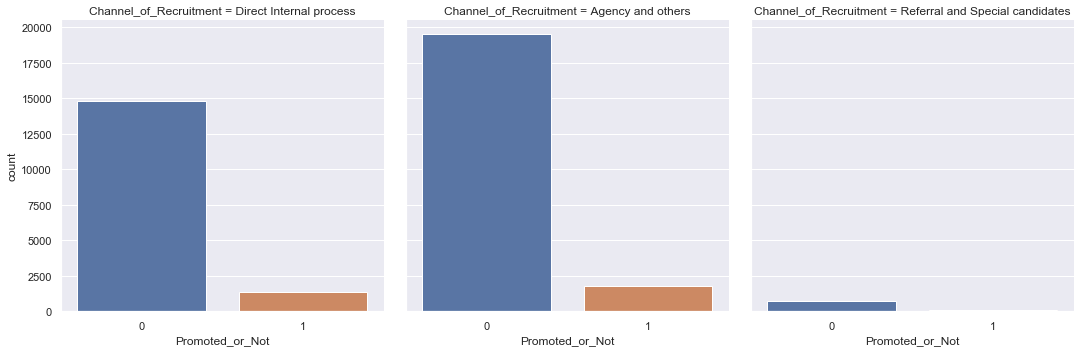

In [15]:
# Use seaborn to build bar plots of the dataset feature 'Promoted_or_Not' split (faceted) over the feature 'Channel_of_Recruitment'

sns.factorplot(x='Promoted_or_Not', col='Channel_of_Recruitment', kind='count', data=train)

C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


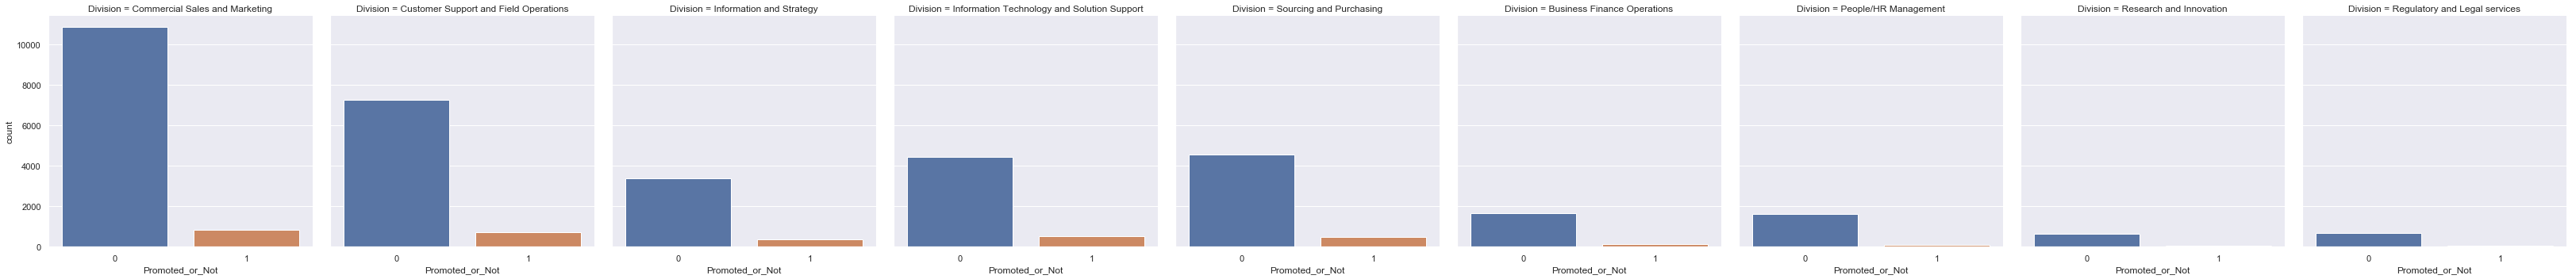

In [16]:
# Use seaborn to build bar plots of the dataset feature 'Promoted_or_Not' split (faceted) over the feature 'Division'

sns.factorplot(x='Promoted_or_Not', col='Division', kind='count', data=train);

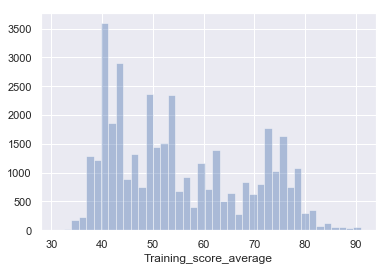

In [26]:
#Use seaborn to plot a histogram of the 'Training_score_average' column of train.
sns.distplot(train.Training_score_average, kde=False);

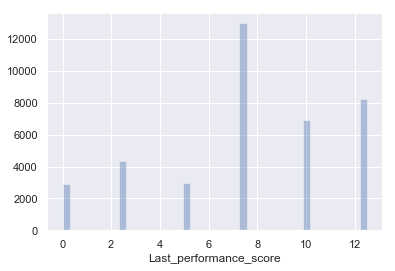

In [27]:
#Use seaborn to plot a histogram of the 'Last_performance_score' column of train.
sns.distplot(train.Last_performance_score, kde=False);

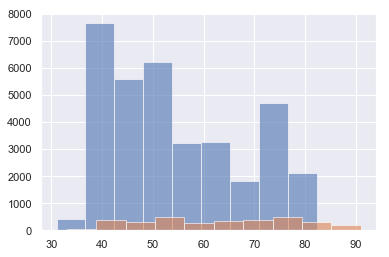

In [20]:
#Use a pandas plotting method to plot the column 'Training_score_average' for each value of 'Promoted_or_Not' on the same plot.
train.groupby('Promoted_or_Not').Last_performance_score.hist(alpha=0.6);

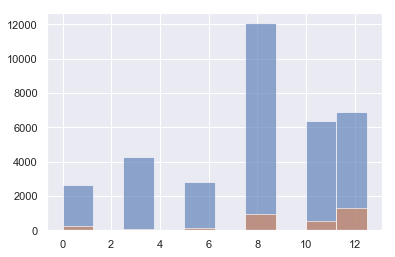

In [28]:
#Use a pandas plotting method to plot the column 'Training_score_average' for each value of 'Promoted_or_Not' on the same plot.
train.groupby('Promoted_or_Not').Last_performance_score.hist(alpha=0.6);

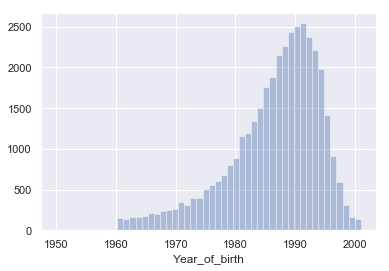

In [24]:
#Use seaborn to plot a histogram of the 'Year_of_birth' column of train.

sns.distplot(train.Year_of_birth, kde=False);

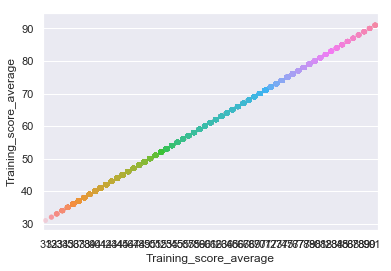

In [31]:
# lot a strip plot & a swarm plot of 'Training_score_average' with 'Promoted_or_Not'on the x-axis.
sns.stripplot(x='Training_score_average', y='Training_score_average', data=train, alpha=0.3, jitter=True);

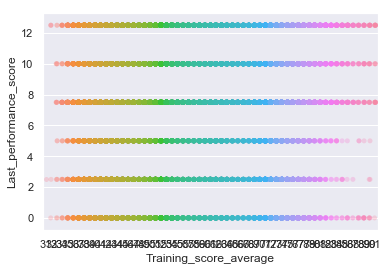

In [32]:
# lot a strip plot & a swarm plot of 'Last_performance_score' with 'Promoted_or_Not'on the x-axis.
sns.stripplot(x='Training_score_average', y='Last_performance_score', data=train, alpha=0.3, jitter=True);

C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


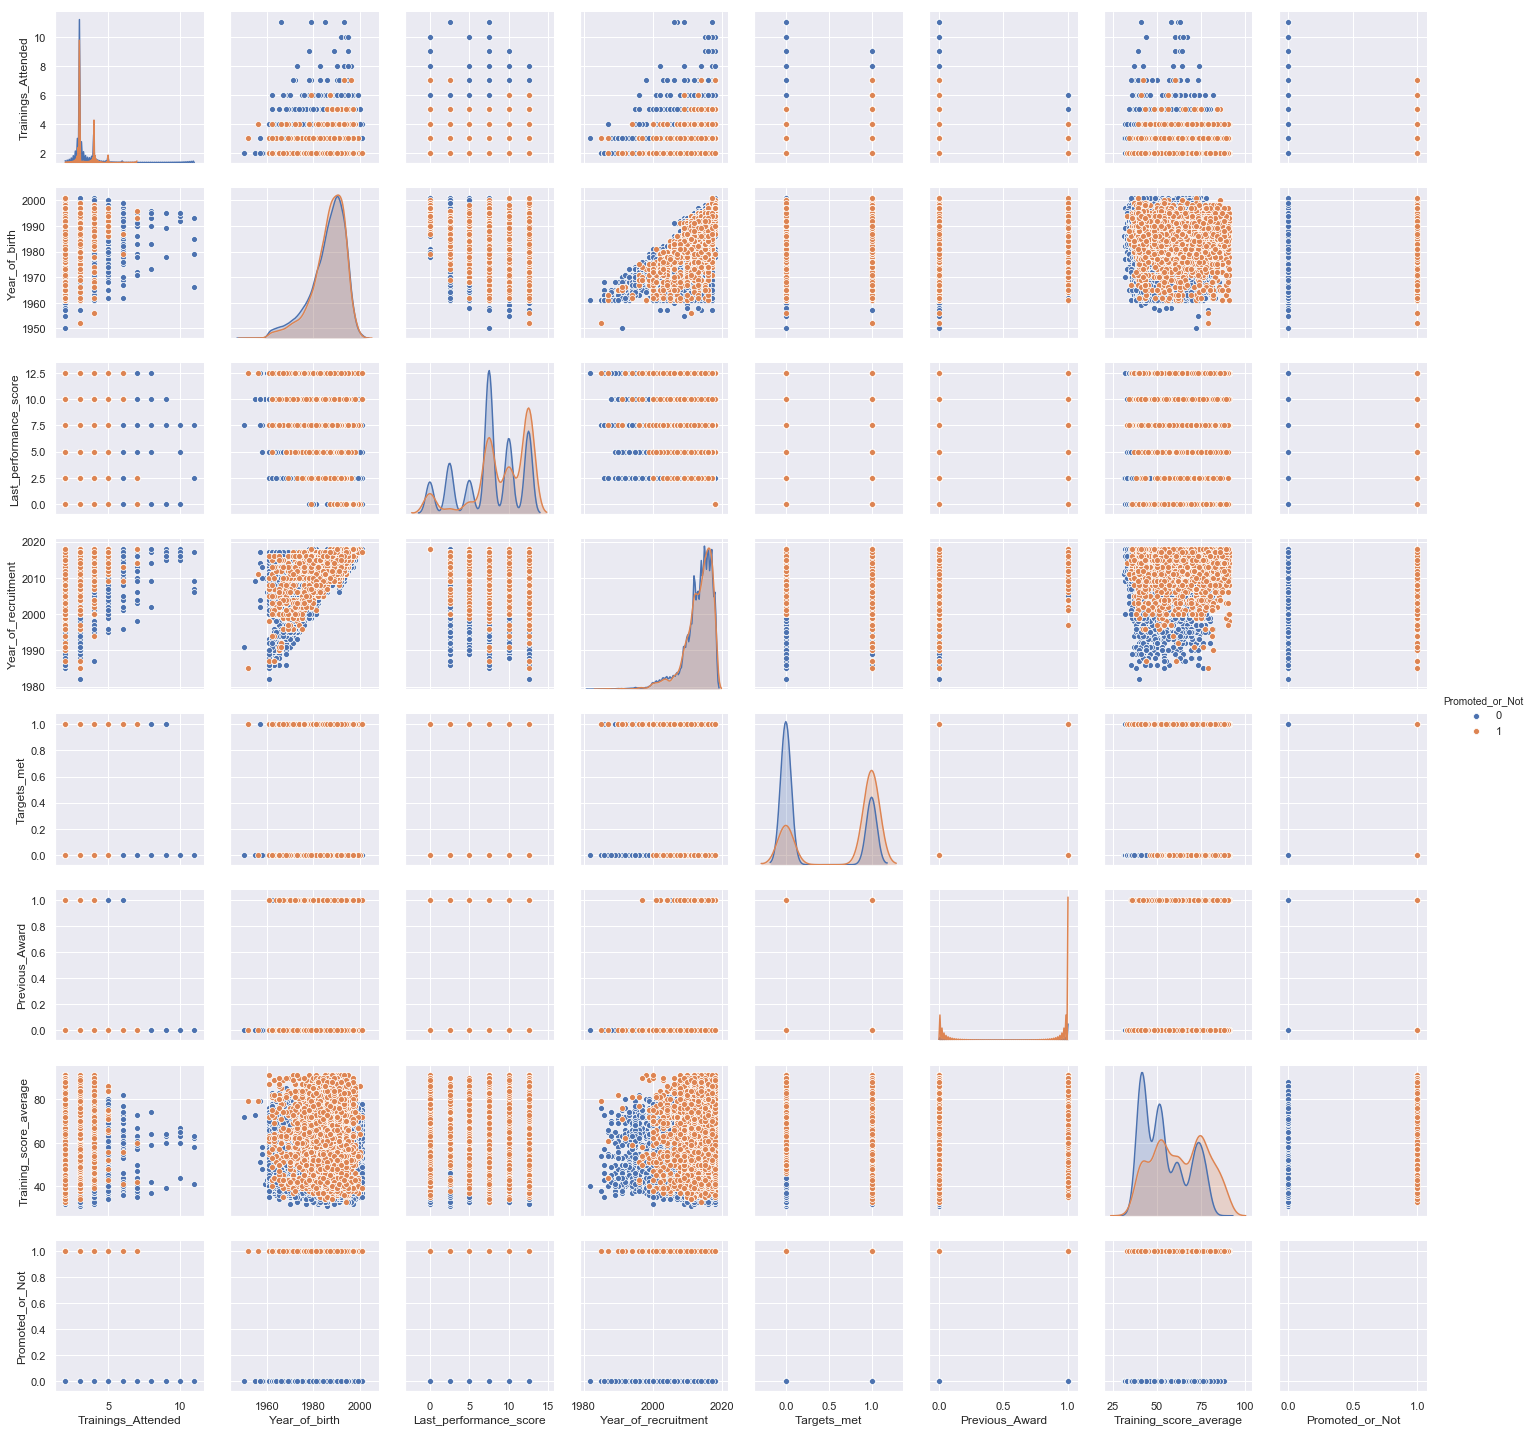

In [33]:
# Use seaborn to create a pairplot of train, colored by 'Promoted_or_Not'
sns.pairplot(train, hue='Promoted_or_Not');

# From EDA to Machine Learning Model using Catboost Algorithm

In [34]:
#Finding the missing values
train.isnull().sum()

EmployeeNo                                0
Division                                  0
Qualification                          1679
Gender                                    0
Channel_of_Recruitment                    0
Trainings_Attended                        0
Year_of_birth                             0
Last_performance_score                    0
Year_of_recruitment                       0
Targets_met                               0
Previous_Award                            0
Training_score_average                    0
State_Of_Origin                           0
Foreign_schooled                          0
Marital_Status                            0
Past_Disciplinary_Action                  0
Previous_IntraDepartmental_Movement       0
No_of_previous_employers                  0
Promoted_or_Not                           0
dtype: int64

In [35]:
#Imputing missing values for both train and test
train.fillna(-999, inplace=True)
test.fillna(-999,inplace=True)

In [50]:
#Creating a training set for modeling and validation set to check model performance
x = train.drop('Promoted_or_Not',axis=1)
y = train.Promoted_or_Not

xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=.70,random_state=1234)

In [51]:
#Look at the data type of variables
x.dtypes

EmployeeNo                              object
Division                                object
Qualification                           object
Gender                                  object
Channel_of_Recruitment                  object
Trainings_Attended                       int64
Year_of_birth                            int64
Last_performance_score                 float64
Year_of_recruitment                      int64
Targets_met                              int64
Previous_Award                           int64
Training_score_average                   int64
State_Of_Origin                         object
Foreign_schooled                        object
Marital_Status                          object
Past_Disciplinary_Action                object
Previous_IntraDepartmental_Movement     object
No_of_previous_employers                object
dtype: object

In [46]:
# handle categorical (CAT) data automatically
cate_features_index = np.where(x.dtypes != float)[0]

In [52]:
# Building model
model = CatBoostClassifier(iterations=500,depth=3, learning_rate=0.1,eval_metric='F1',use_best_model=True,random_seed=452)
model.fit(xtrain,ytrain,cat_features=cate_features_index,eval_set=(xtest,ytest))

0:	learn: 0.4440040	test: 0.4788949	best: 0.4788949 (0)	total: 373ms	remaining: 3m 6s
1:	learn: 0.4370370	test: 0.4832945	best: 0.4832945 (1)	total: 447ms	remaining: 1m 51s
2:	learn: 0.4377537	test: 0.4774495	best: 0.4832945 (1)	total: 536ms	remaining: 1m 28s
3:	learn: 0.4373731	test: 0.4781250	best: 0.4832945 (1)	total: 601ms	remaining: 1m 14s
4:	learn: 0.4398649	test: 0.4774495	best: 0.4832945 (1)	total: 697ms	remaining: 1m 8s
5:	learn: 0.4382820	test: 0.4786325	best: 0.4832945 (1)	total: 753ms	remaining: 1m 2s
6:	learn: 0.4373731	test: 0.4781250	best: 0.4832945 (1)	total: 817ms	remaining: 57.6s
7:	learn: 0.4373731	test: 0.4781250	best: 0.4832945 (1)	total: 892ms	remaining: 54.8s
8:	learn: 0.4384303	test: 0.4790047	best: 0.4832945 (1)	total: 949ms	remaining: 51.8s
9:	learn: 0.4382820	test: 0.4781931	best: 0.4832945 (1)	total: 1.03s	remaining: 50.4s
10:	learn: 0.4414445	test: 0.4781931	best: 0.4832945 (1)	total: 1.09s	remaining: 48.3s
11:	learn: 0.4403918	test: 0.4781250	best: 0.48329

96:	learn: 0.4801561	test: 0.4860681	best: 0.4868624 (61)	total: 10.2s	remaining: 42.3s
97:	learn: 0.4796616	test: 0.4860681	best: 0.4868624 (61)	total: 10.3s	remaining: 42.2s
98:	learn: 0.4796616	test: 0.4860681	best: 0.4868624 (61)	total: 10.4s	remaining: 42.2s
99:	learn: 0.4799739	test: 0.4860681	best: 0.4868624 (61)	total: 10.5s	remaining: 42.2s
100:	learn: 0.4809632	test: 0.4860681	best: 0.4868624 (61)	total: 10.7s	remaining: 42.1s
101:	learn: 0.4809632	test: 0.4860681	best: 0.4868624 (61)	total: 10.8s	remaining: 42s
102:	learn: 0.4814574	test: 0.4860681	best: 0.4868624 (61)	total: 10.9s	remaining: 41.9s
103:	learn: 0.4813008	test: 0.4860681	best: 0.4868624 (61)	total: 11s	remaining: 41.9s
104:	learn: 0.4813008	test: 0.4860681	best: 0.4868624 (61)	total: 11.2s	remaining: 42s
105:	learn: 0.4821313	test: 0.4860681	best: 0.4868624 (61)	total: 11.3s	remaining: 41.9s
106:	learn: 0.4814815	test: 0.4860681	best: 0.4868624 (61)	total: 11.4s	remaining: 41.8s
107:	learn: 0.4816380	test: 0.4

189:	learn: 0.4867314	test: 0.4853168	best: 0.4872390 (110)	total: 20.5s	remaining: 33.5s
190:	learn: 0.4867314	test: 0.4856922	best: 0.4872390 (110)	total: 20.6s	remaining: 33.4s
191:	learn: 0.4867314	test: 0.4856922	best: 0.4872390 (110)	total: 20.8s	remaining: 33.3s
192:	learn: 0.4872210	test: 0.4856922	best: 0.4872390 (110)	total: 20.9s	remaining: 33.2s
193:	learn: 0.4872210	test: 0.4856922	best: 0.4872390 (110)	total: 21s	remaining: 33.1s
194:	learn: 0.4875525	test: 0.4853168	best: 0.4872390 (110)	total: 21.1s	remaining: 33s
195:	learn: 0.4875525	test: 0.4853168	best: 0.4872390 (110)	total: 21.2s	remaining: 32.9s
196:	learn: 0.4870634	test: 0.4853168	best: 0.4872390 (110)	total: 21.3s	remaining: 32.8s
197:	learn: 0.4870634	test: 0.4853168	best: 0.4872390 (110)	total: 21.4s	remaining: 32.7s
198:	learn: 0.4875525	test: 0.4853168	best: 0.4872390 (110)	total: 21.5s	remaining: 32.5s
199:	learn: 0.4880414	test: 0.4853168	best: 0.4872390 (110)	total: 21.6s	remaining: 32.4s
200:	learn: 0.

282:	learn: 0.4891901	test: 0.4869029	best: 0.4872783 (254)	total: 29.6s	remaining: 22.7s
283:	learn: 0.4891901	test: 0.4869029	best: 0.4872783 (254)	total: 29.7s	remaining: 22.6s
284:	learn: 0.4891901	test: 0.4869029	best: 0.4872783 (254)	total: 29.8s	remaining: 22.4s
285:	learn: 0.4891901	test: 0.4869029	best: 0.4872783 (254)	total: 29.8s	remaining: 22.3s
286:	learn: 0.4891901	test: 0.4869029	best: 0.4872783 (254)	total: 29.9s	remaining: 22.2s
287:	learn: 0.4890323	test: 0.4869029	best: 0.4872783 (254)	total: 30.1s	remaining: 22.1s
288:	learn: 0.4890323	test: 0.4869029	best: 0.4872783 (254)	total: 30.1s	remaining: 22s
289:	learn: 0.4890323	test: 0.4869029	best: 0.4872783 (254)	total: 30.2s	remaining: 21.9s
290:	learn: 0.4890323	test: 0.4869029	best: 0.4872783 (254)	total: 30.3s	remaining: 21.8s
291:	learn: 0.4890323	test: 0.4869029	best: 0.4872783 (254)	total: 30.4s	remaining: 21.7s
292:	learn: 0.4890323	test: 0.4869029	best: 0.4872783 (254)	total: 30.5s	remaining: 21.5s
293:	learn: 

375:	learn: 0.4913071	test: 0.4880677	best: 0.4884438 (360)	total: 38.2s	remaining: 12.6s
376:	learn: 0.4911490	test: 0.4880677	best: 0.4884438 (360)	total: 38.3s	remaining: 12.5s
377:	learn: 0.4911490	test: 0.4880677	best: 0.4884438 (360)	total: 38.4s	remaining: 12.4s
378:	learn: 0.4911490	test: 0.4880677	best: 0.4884438 (360)	total: 38.5s	remaining: 12.3s
379:	learn: 0.4916345	test: 0.4884438	best: 0.4884438 (360)	total: 38.6s	remaining: 12.2s
380:	learn: 0.4916345	test: 0.4884438	best: 0.4884438 (360)	total: 38.7s	remaining: 12.1s
381:	learn: 0.4916345	test: 0.4884438	best: 0.4884438 (360)	total: 38.8s	remaining: 12s
382:	learn: 0.4916345	test: 0.4884438	best: 0.4884438 (360)	total: 38.9s	remaining: 11.9s
383:	learn: 0.4916345	test: 0.4884438	best: 0.4884438 (360)	total: 39s	remaining: 11.8s
384:	learn: 0.4916345	test: 0.4880677	best: 0.4884438 (360)	total: 39.2s	remaining: 11.7s
385:	learn: 0.4916345	test: 0.4880677	best: 0.4884438 (360)	total: 39.3s	remaining: 11.6s
386:	learn: 0.

468:	learn: 0.4937238	test: 0.4880677	best: 0.4884438 (360)	total: 47.8s	remaining: 3.16s
469:	learn: 0.4942085	test: 0.4880677	best: 0.4884438 (360)	total: 47.9s	remaining: 3.06s
470:	learn: 0.4942085	test: 0.4880677	best: 0.4884438 (360)	total: 48.1s	remaining: 2.96s
471:	learn: 0.4942085	test: 0.4876923	best: 0.4884438 (360)	total: 48.2s	remaining: 2.86s
472:	learn: 0.4942085	test: 0.4876923	best: 0.4884438 (360)	total: 48.3s	remaining: 2.75s
473:	learn: 0.4935650	test: 0.4876923	best: 0.4884438 (360)	total: 48.4s	remaining: 2.65s
474:	learn: 0.4940495	test: 0.4876923	best: 0.4884438 (360)	total: 48.4s	remaining: 2.55s
475:	learn: 0.4945338	test: 0.4876923	best: 0.4884438 (360)	total: 48.5s	remaining: 2.45s
476:	learn: 0.4945338	test: 0.4880677	best: 0.4884438 (360)	total: 48.6s	remaining: 2.34s
477:	learn: 0.4945338	test: 0.4880677	best: 0.4884438 (360)	total: 48.7s	remaining: 2.24s
478:	learn: 0.4945338	test: 0.4880677	best: 0.4884438 (360)	total: 48.8s	remaining: 2.14s
479:	learn

In [53]:
# predict the outcome for test data set
pred = model.predict(test)
pred = pred.astype(np.int)
submission = pd.DataFrame({'EmployeeNo':test['EmployeeNo'],'Promoted_or_Not':pred})
submission.to_csv('local_catboost_sub.csv',index=False)